In [30]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from plotnine import ggplot, aes, geom_line, geom_bar, geom_boxplot, geom_abline, geom_tile, facet_grid, facet_wrap,geom_point

In [2]:
data_set = pd.read_csv('airbnb.csv', index_col ='room_id')
data_set.head()

,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
room_id,,,,,,,,,,,,,,,,,,,
10176931,1476,49180562,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,7,4.5,2,1.0,NaN,156.0,NaN,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
8935871,1476,46718394,Shared room,NaN,Amsterdam,NaN,Centrum West,45,4.5,4,1.0,NaN,126.0,NaN,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
14011697,1476,10346595,Shared room,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,3,1.0,NaN,132.0,NaN,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
6137978,1476,8685430,Shared room,NaN,Amsterdam,NaN,Centrum West,7,5.0,4,1.0,NaN,121.0,NaN,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...
18630616,1476,70191803,Shared room,NaN,Amsterdam,NaN,De Baarsjes / Oud West,1,0.0,2,1.0,NaN,93.0,NaN,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...


In [ ]:
data_set.info()

In [4]:
data = data_set.drop(columns = ['survey_id','borough','country','bathrooms','minstay'] , axis=1 )

In [9]:
data.describe(include='all')

,host_id,room_type,city,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,last_modified,latitude,longitude,location
count,1.872300e+04,18723,18723,18723,18723.000000,18723.000000,18723.000000,18723.000000,18723.000000,18671,18723,18723.000000,18723.000000,18723
unique,NaN,3,1,23,NaN,NaN,NaN,NaN,NaN,18150,18723,NaN,NaN,18723
top,NaN,Entire home/apt,Amsterdam,De Baarsjes / Oud West,NaN,NaN,NaN,NaN,NaN,Amsterdam,2017-07-22 16:38:36.407736,NaN,NaN,0101000020E6100000A5164A26A7961340C4995FCD012E...
freq,NaN,14978,18723,3289,NaN,NaN,NaN,NaN,NaN,36,1,NaN,NaN,1
mean,3.577612e+07,NaN,NaN,NaN,16.741548,3.301127,2.922021,1.430380,166.599477,NaN,NaN,52.365261,4.888585,NaN
std,3.758103e+07,NaN,NaN,NaN,33.522630,2.213558,1.327524,0.879019,108.943849,NaN,NaN,0.015142,0.034537,NaN
min,2.234000e+03,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000,12.000000,NaN,NaN,52.296200,4.763264,NaN
25%,7.140879e+06,NaN,NaN,NaN,2.000000,0.000000,2.000000,1.000000,108.000000,NaN,NaN,52.355254,4.864344,NaN
50%,1.988641e+07,NaN,NaN,NaN,6.000000,4.500000,2.000000,1.000000,144.000000,NaN,NaN,52.364628,4.885994,NaN
75%,5.202680e+07,NaN,NaN,NaN,17.000000,5.000000,4.000000,2.000000,192.000000,NaN,NaN,52.374797,4.907480,NaN


In [6]:
int_var = [i for i in data.columns if (data[i].dtype == 'int64') or (data[i].dtype == 'float64') ]

In [21]:
data[int_var].corr(method = 'pearson')

,host_id,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude
host_id,1.000000,-0.183331,-0.203703,0.014030,-0.016995,-0.016390,-0.026079,0.010722
reviews,-0.183331,1.000000,0.316705,-0.061360,-0.114641,-0.084516,0.050451,-0.012108
overall_satisfaction,-0.203703,0.316705,1.000000,-0.053410,-0.087664,-0.044775,0.041197,-0.017531
accommodates,0.014030,-0.061360,-0.053410,1.000000,0.711051,0.500350,0.003836,0.104110
bedrooms,-0.016995,-0.114641,-0.087664,0.711051,1.000000,0.446144,-0.011094,0.095636
price,-0.016390,-0.084516,-0.044775,0.500350,0.446144,1.000000,0.013759,0.021770
latitude,-0.026079,0.050451,0.041197,0.003836,-0.011094,0.013759,1.000000,-0.107549
longitude,0.010722,-0.012108,-0.017531,0.104110,0.095636,0.021770,-0.107549,1.000000


In [115]:
data_set['accommodates'].value_counts().sort_index()
round(data_set['price'].loc[data_set['overall_satisfaction'] == 5].mean(),1)

1       367
2     10024
3      1585
4      5579
5       471
6       476
7        52
8       105
9         8
10       16
11        2
12       10
13        1
14        6
16       20
17        1
Name: accommodates, dtype: int64

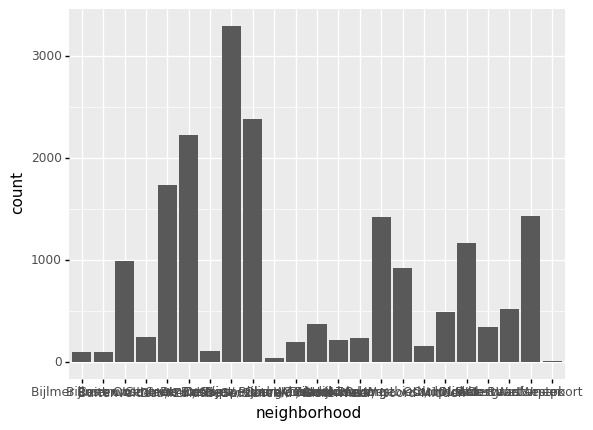

<ggplot: (96325210841)>

In [24]:
ggplot(data) +aes(x='neighborhood')+ geom_bar()

In [65]:
#fazer line price com room_type
data['room_type']



KeyError: 2

Help on class geom_bar in module plotnine.geoms.geom_bar:

class geom_bar(plotnine.geoms.geom_rect.geom_rect)
 |  geom_bar(mapping=None, data=None, **kwargs)
 |  
 |  Bar plot
 |  
 |  
 |  .. rubric:: Usage
 |  
 |  ::
 |  
 |      geom_bar(mapping=None, data=None, stat='count', position='stack', na_rm=False,
 |               inherit_aes=True, show_legend=None, raster=False, width=None,
 |               **kwargs)
 |  
 |  Only the ``mapping`` and ``data`` can be positional, the rest must
 |  be keyword arguments. ``**kwargs`` can be aesthetics (or parameters)
 |  used by the ``stat``.
 |  
 |  
 |  Parameters
 |  ----------
 |  mapping : aes, optional
 |      Aesthetic mappings created with :meth:`~plotnine.aes`. If specified and :py:`inherit.aes=True`, it is combined with the default mapping for the plot. You must supply mapping if there is no plot mapping.
 |      
 |      ========= =========
 |      Aesthetic Default value
 |      ========= =========
 |      **x**     
 |      **y*